# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você.*

*Base* 

Link: https://www.kaggle.com/shahir/protein-data-set#pdb_data_no_dups.csv

Descrição: Banco de dados que contém informações estruturais a respeito proteínas cristalizadas.

Motivação: Minha primeira opção de tcc na graduação foi sobre este tema, mas tive que suspender e curso e ao voltar troquei de orientador e de tema. Porém mantenho interesse em bioinformática.


### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


*Descrição da base e suas variáveis*

Este dataset tem origem em arquivo PDB - [Proteín Data Bank] (http://www.rcsb.org/pdb/) - um banco de dados de informações estruturais sobre proteínas 

1. __structureid__ - _não será trabalhado_ - Identificador do registro
2. __classification__ - classificação quanto função de molécula
    * Hidrolase: enzizamas que assiciadas à agua qubram ligações de moléculas
    * Tranferase: enzimas que transportam partes de uma molécula para outra molécula
    * Outras: outros funções
3. __experimentalTechnique__ - A técnica que foi usada para obter os dados extruturais
4. __macromoleculeType__ - O tipo da macromolécula
    * Proteína
    * Proteína#DNA
    * Outras
5. __residueCount__ - quantidade de residuos que forman a molécula
6. __resolution__ - Medida da qualidade dos dados coletados a respeito da estrutura
7. __structureMolecularWeight__ - Peso molecular 
8. __crystallizationMethod__ -
9. __crystallizationTempK__ - temperatura de cristalização
10. __densityMatthews__ - densidade do cristal 
11. __densityPercentSol__ - densidade do solvente - a estrtura observada está imersa em um solvente, está é densidade calculada do conteúdo solvente mais a do solvente
12. __pdbxDetails__ - __não será usada__ __string(descritiva)__ - contem infomações diversas extarídas do arquivo pdbx original
13. __phValue__ - o PH de onde o cristla foi cultivado
14. __publicationYear__ __não será usada__- o ano da publicação do registro

__Categóricas:__
classification
experimentalTechnique
macromoleculeType
crystallizationMethod

__Discretas:__
structureid
residueCount
publicationYear

__Continuas:__
resolution
structureMolecularWeight
crystallizationTempK
densityMatthews
densityPercentSol
phValue

__descritivas__
pdbxDetails









### 2) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [1]:
#importa bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:



#lê arquivo do google drive
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#arquivo_base = "/content/drive/My Drive/Colab Notebooks/pdb_data_no_dups.csv"
arquivo_base = "pdb_data_no_dups.csv"
df = pd.read_csv(arquivo_base)


In [3]:
#olhnado os dados
df

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141396,9RUB,LYASE(CARBON-CARBON),X-RAY DIFFRACTION,Protein,932,2.60,101838.68,NaN,NaN,2.38,48.29,NaN,NaN,1991.0
141397,9TNA,T-RNA,X-RAY DIFFRACTION,NaN,0,NaN,24244.34,NaN,NaN,3.17,61.18,NaN,NaN,1986.0
141398,9WGA,LECTIN (AGGLUTININ),X-RAY DIFFRACTION,Protein,342,1.80,34270.22,NaN,NaN,2.50,50.76,NaN,NaN,1990.0
141399,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,388,1.90,43542.29,NaN,NaN,2.79,55.93,NaN,NaN,1989.0


In [4]:
df.dtypes

structureId                  object
classification               object
experimentalTechnique        object
macromoleculeType            object
residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationMethod        object
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
pdbxDetails                  object
phValue                     float64
publicationYear             float64
dtype: object

In [5]:
df.describe()


,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
count,141401.000000,128589.000000,1.414010e+05,97039.000000,124724.000000,124749.000000,105110.000000,117602.000000
mean,825.374849,2.263807,1.120790e+05,290.967713,2.670267,51.353163,6.788685,2008.922365
std,2136.461080,1.410878,5.690152e+05,9.541080,0.783740,10.104561,2.556819,8.459286
min,0.000000,0.480000,3.143800e+02,4.000000,0.000000,0.000000,0.000000,201.000000
25%,226.000000,1.800000,2.612856e+04,290.000000,2.210000,44.370000,6.000000,2005.000000
50%,414.000000,2.100000,4.747779e+04,293.000000,2.490000,50.500000,7.000000,2010.000000
75%,820.000000,2.500000,9.408484e+04,295.000000,2.910000,57.710000,7.500000,2014.000000
max,313236.000000,70.000000,9.773054e+07,398.000000,99.000000,92.000000,724.000000,2018.000000


In [6]:
round(df.isnull().mean()*100,2)

structureId                  0.00
classification               0.00
experimentalTechnique        0.00
macromoleculeType            2.66
residueCount                 0.00
resolution                   9.06
structureMolecularWeight     0.00
crystallizationMethod       31.94
crystallizationTempK        31.37
densityMatthews             11.79
densityPercentSol           11.78
pdbxDetails                 16.17
phValue                     25.67
publicationYear             16.83
dtype: float64

In [7]:
# elinando as colunafeatures que não serão usadas
df.drop(['structureId','pdbxDetails','publicationYear'], inplace=True, axis=1)


In [8]:
df.head()

,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue
0,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,7.0
1,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN
2,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,9.0
3,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,7.0
4,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN


In [9]:
#eliminado todos os registro que possuem algum valor nula em qulaqueer feature
df.dropna(inplace=True)

In [10]:
round(df.isnull().mean()*100,2)


classification              0.0
experimentalTechnique       0.0
macromoleculeType           0.0
residueCount                0.0
resolution                  0.0
structureMolecularWeight    0.0
crystallizationMethod       0.0
crystallizationTempK        0.0
densityMatthews             0.0
densityPercentSol           0.0
phValue                     0.0
dtype: float64

In [11]:
df.shape

(81369, 11)

In [12]:
#Após remover os nulos mantivemos 81369 de 141401 registros (57.5% da base)


In [13]:
df.describe()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
count,81369.000000,81369.000000,8.136900e+04,81369.000000,81369.000000,81369.000000,81369.000000
mean,778.841045,2.131411,9.563158e+04,291.055762,2.655831,51.276572,6.797337
std,1524.656676,0.566157,2.727872e+05,8.783617,0.689463,9.886387,2.826222
min,5.000000,0.480000,4.885400e+02,4.000000,0.000000,0.000000,0.000000
25%,274.000000,1.760000,3.167522e+04,290.000000,2.210000,44.310000,6.000000
50%,456.000000,2.030000,5.203482e+04,293.000000,2.480000,50.280000,7.000000
75%,840.000000,2.480000,9.585623e+04,295.000000,2.900000,57.480000,7.500000
max,89160.000000,9.500000,1.699046e+07,398.000000,12.700000,90.330000,724.000000


### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

In [14]:
#Como há categorias com nomes grandes optei por mostar a tabela de frequência ao invés do gráfico,

In [15]:
#categóricas:
df.classification.value_counts(normalize=True)


HYDROLASE                                0.160467
TRANSFERASE                              0.123475
OXIDOREDUCTASE                           0.096720
LYASE                                    0.037508
IMMUNE SYSTEM                            0.033477
                                           ...   
PLANT PROTEIN, LYASE                     0.000012
MEMBRANE PROTEIN,IMMUNE SYSTEM           0.000012
tranport protein, viral protein          0.000012
TRANSPORT PROTEIN/DNA binding Protein    0.000012
Oxidoreductase, Membrane protein         0.000012
Name: classification, Length: 2736, dtype: float64

In [16]:
df.experimentalTechnique.value_counts(normalize=True)


X-RAY DIFFRACTION                         0.999558
NEUTRON DIFFRACTION                       0.000147
POWDER DIFFRACTION                        0.000074
ELECTRON CRYSTALLOGRAPHY                  0.000061
X-RAY DIFFRACTION, EPR                    0.000061
NEUTRON DIFFRACTION, X-RAY DIFFRACTION    0.000061
SOLUTION SCATTERING, X-RAY DIFFRACTION    0.000012
EPR, X-RAY DIFFRACTION                    0.000012
X-RAY DIFFRACTION, NEUTRON DIFFRACTION    0.000012
Name: experimentalTechnique, dtype: float64

In [17]:
df.macromoleculeType.value_counts(normalize=True)


Protein                       0.933783
Protein#DNA                   0.033625
Protein#RNA                   0.013814
DNA                           0.008406
RNA                           0.007153
Protein#DNA#RNA               0.001807
DNA/RNA Hybrid                0.000393
Protein#DNA#DNA/RNA Hybrid    0.000393
RNA#DNA/RNA Hybrid            0.000221
DNA#RNA                       0.000209
Protein#DNA/RNA Hybrid        0.000135
Protein#RNA#DNA/RNA Hybrid    0.000049
DNA#DNA/RNA Hybrid            0.000012
Name: macromoleculeType, dtype: float64

In [18]:
df.crystallizationMethod.value_counts(normalize=True)

VAPOR DIFFUSION, HANGING DROP                0.571680
VAPOR DIFFUSION, SITTING DROP                0.310671
VAPOR DIFFUSION                              0.054726
EVAPORATION                                  0.009844
MICROBATCH                                   0.009758
                                               ...   
Vapor diffusion, Sitting-drop and Soaking    0.000012
microseeding method                          0.000012
Solid-liquid interface method                0.000012
Gel Acupuncture Method (GAME)                0.000012
Oil batch method                             0.000012
Name: crystallizationMethod, Length: 475, dtype: float64

In [19]:
#discretas
df.residueCount.value_counts(normalize=True)

330      0.007448
312      0.005493
260      0.005346
198      0.005088
129      0.004830
           ...   
2597     0.000012
11400    0.000012
7463     0.000012
27648    0.000012
1695     0.000012
Name: residueCount, Length: 3292, dtype: float64

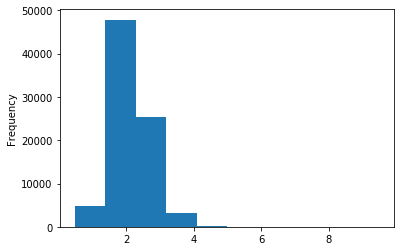

In [20]:
#contínuas
df.resolution.plot(kind="hist")

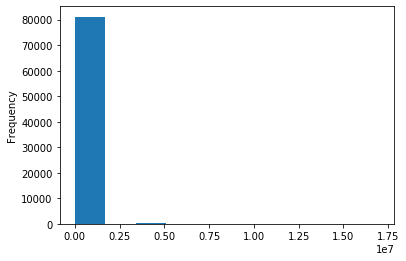

In [21]:
df.structureMolecularWeight.plot(kind="hist") 

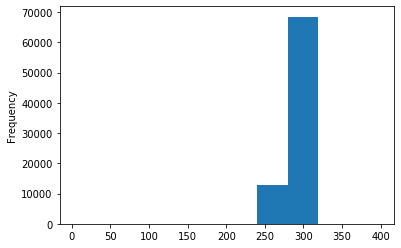

In [22]:
df.crystallizationTempK.plot(kind="hist") 

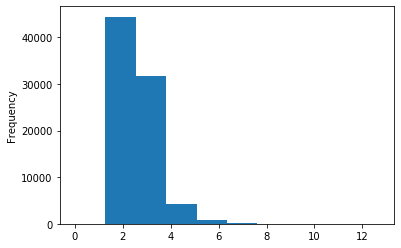

In [23]:
df.densityMatthews.plot(kind="hist")

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


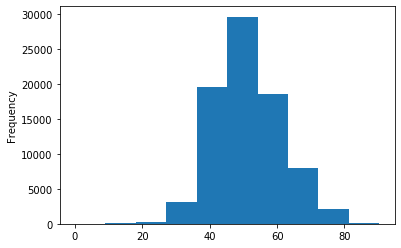

In [24]:
df.densityPercentSol.plot(kind="hist")

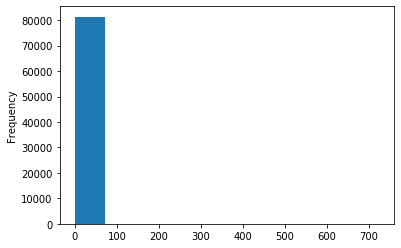

In [25]:
df.phValue.plot(kind="hist")

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [26]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [27]:
dfCat1 = df[df["classification"] == "HYDROLASE"]
dfCat2 = df[df["classification"] == "TRANSFERASE"]
dfCat3 = df[~df["classification"].isin(["HYDROLASE","TRANSFERASE"])]


In [28]:
varList = {'freq':['experimentalTechnique', 'macromoleculeType', 'crystallizationMethod', 'residueCount'],'hist': ['resolution', 'structureMolecularWeight', 'crystallizationTempK', 'densityMatthews', 'densityPercentSol', 'phValue']}

varHist=['resolution', 'structureMolecularWeight', 'crystallizationTempK', 'densityMatthews', 'densityPercentSol', 'phValue']

#########################

Frequência da freature ' experimentalTechnique '

#########################

Para todos os valores:

X-RAY DIFFRACTION                         0.999558
NEUTRON DIFFRACTION                       0.000147
POWDER DIFFRACTION                        0.000074
ELECTRON CRYSTALLOGRAPHY                  0.000061
X-RAY DIFFRACTION, EPR                    0.000061
NEUTRON DIFFRACTION, X-RAY DIFFRACTION    0.000061
SOLUTION SCATTERING, X-RAY DIFFRACTION    0.000012
EPR, X-RAY DIFFRACTION                    0.000012
X-RAY DIFFRACTION, NEUTRON DIFFRACTION    0.000012
Name: experimentalTechnique, dtype: float64

Em relação à Hydrolase:

X-RAY DIFFRACTION         0.999004
POWDER DIFFRACTION        0.000383
NEUTRON DIFFRACTION       0.000306
X-RAY DIFFRACTION, EPR    0.000230
EPR, X-RAY DIFFRACTION    0.000077
Name: experimentalTechnique, dtype: float64

Em relação à Transferase:

X-RAY DIFFRACTION           0.9999
ELECTRON CRYSTALLOGRAPHY    0.0001
Name: experimentalTechniqu

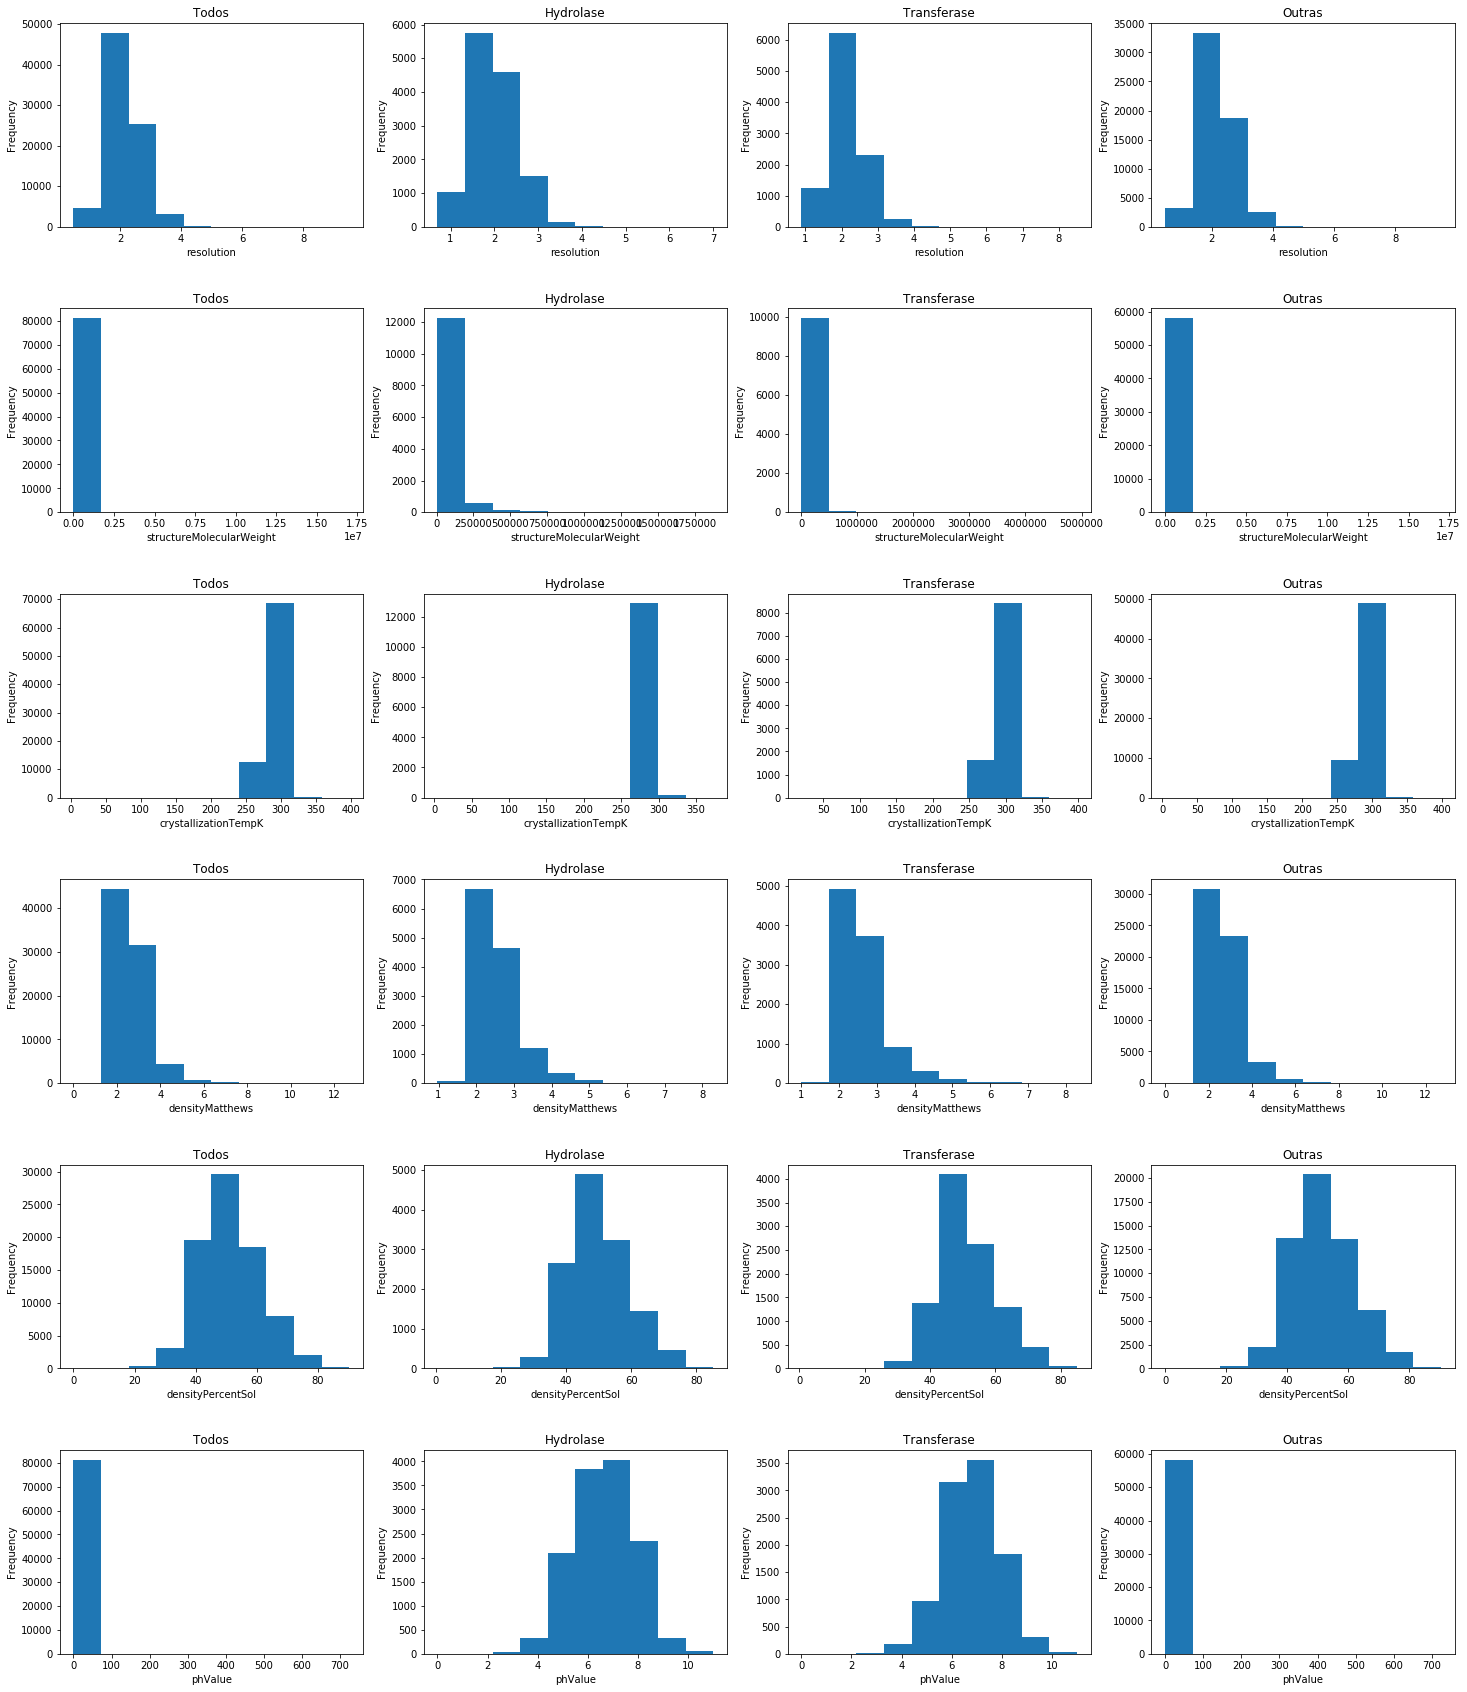

In [29]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
#fig.subplots_adjust(hspace=0.8)
#fig.suptitle('Histogramas')

fig, axs = plt.subplots(nrows=6, ncols=4,  figsize=(25, 30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
i=0
for type in varList:
    list = varList[type]
    for key in list:

        if (type == 'freq'):
            print("#########################\n")       
            print("Frequência da freature '", key, "'\n")       
            print("#########################\n")       
            print("Para todos os valores:\n")       
            print(df[key].value_counts(normalize=True))
            print("\nEm relação à Hydrolase:\n")       
            print(dfCat1[key].value_counts(normalize=True))
            print("\nEm relação à Transferase:\n")       
            print(dfCat2[key].value_counts(normalize=True))
            print("\nEm relação às outras classificações:\n")       
            print(dfCat3[key].value_counts(normalize=True))
        if (type == 'hist'):
            axs[i,0].set_title('Todos')
            axs[i,1].set_title('Hydrolase')
            axs[i,2].set_title('Transferase')
            axs[i,3].set_title('Outras')
            axs[i,0].set_xlabel(key)
            axs[i,1].set_xlabel(key)
            axs[i,2].set_xlabel(key)
            axs[i,3].set_xlabel(key)
            
            df[key].plot(kind = "hist",ax=axs[i,0])
            dfCat1[key].plot(kind = "hist",ax=axs[i,1])
            dfCat2[key].plot(kind = "hist",ax=axs[i,2])
            dfCat3[key].plot(kind = "hist",ax=axs[i,3])
            i=i+1
plt.show()

   

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.


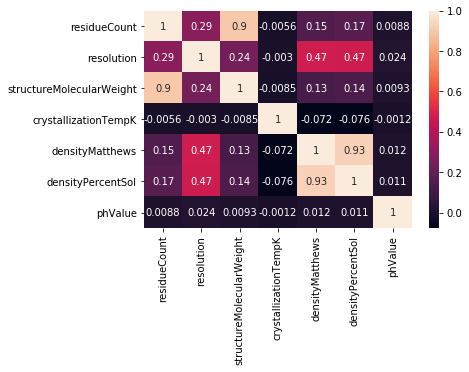

In [30]:
import seaborn as sn
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

In [31]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
#sn.factorplot("structureMolecularWeight", "residueCount", data=df, kind="bar", legend=False) 
#plt.show()

In [0]:
sn.lineplot(x="residueCount", y="structureMolecularWeight", data=df)
plt.show()

In [0]:
sn.relplot(x="residueCount", y="structureMolecularWeight", data=df)

In [0]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [0]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*